In [276]:
import os
import csv
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [277]:
# cpi_ten_years_data_file = Path("cpi_ten_years.csv")
# indeed_country_data_file = Path("Hiring_Lab_subset_country_data_to_2023-07-28.csv")
# indeed_illinois_data_file = Path("Hiring_Lab_subset_states_data_to_2023-07-28.csv")
# unemploy_ave_and_pop_illinois_data_file = Path("unemployment_averages_and_population_il.csv")
# unemploy_five_years_illinois_data_file = Path("unemployment_il_five_years.csv")
# unemploy_five_years_national_data_file = Path("unemployment_national_five_years.csv")

# cpi_ten_years = pd.read_csv(cpi_ten_years_data_file)
# indeed_country = pd.read_csv(indeed_country_data_file)
# indeed_illinois = pd.read_csv(indeed_illinois_data_file)
# unemploy_ave_and_pop_illinois = pd.read_csv(unemploy_ave_and_pop_illinois_data_file)
# unemploy_five_years_illinois = pd.read_csv(unemploy_five_years_illinois_data_file)
# unemploy_five_years_national = pd.read_csv(unemploy_five_years_national_data_file)

cpi_ten_years = pd.read_csv('../project 1/cpi_ten_years.csv')
indeed_country = pd.read_csv('../project 1/Hiring_Lab_subset_country_data_to_2023-07-28.csv')
indeed_illinois = pd.read_csv('../project 1/Hiring_Lab_subset_states_data_to_2023-07-28.csv')
unemploy_ave_and_pop_illinois = pd.read_csv('../project 1/unemployment_averages_and_population_il.csv')
unemploy_ave_and_pop_illinois2 = pd.read_csv('../project 1/unemployment_averages_and_population_il2.csv')
unemploy_five_years_illinois = pd.read_csv('../project 1/unemployment_il_five_years.csv')
unemploy_five_years_national = pd.read_csv('../project 1/unemployment_national_five_years.csv')
unemploy_ten_years_national = pd.read_csv('../project 1/unemployment_national_ten_years.csv')

In [278]:
#cpi_ten_years.tail()
unemploy_ten_years_national.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
1,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
2,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
3,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
4,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1


In [279]:
#cpi_five_years = cpi_ten_years.loc[['2018', '2019', '2020', '2021', '2022', '2023']]

YTD = []

cpi_ten_years["YTD"] = 0
cpi_five_years = cpi_ten_years.iloc[5:11, :].fillna(0)
cpi_five_years_clean = cpi_five_years[['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'YTD']]
# cpi_five_years_clean_reset = cpi_five_years_clean.reset_index('Year', inplace=True, drop=True) *need the inplace and drop in there too!
# cpi_five_years_clean
# thought we could use this somewhere, but didn't... pd.to_numeric(row)

In [280]:
for index, row in cpi_five_years_clean.iterrows():
    year_sum = row.iloc[1:13].sum()
    YTD.append(year_sum)

cpi_five_years_clean["YTD"] = YTD
#    print(row.iloc[1:13].sum())
#YTD_df = pd.DataFrame({
#                        "YTD": YTD
#})

cpi_five_years_clean

#cpi_merged_df = pd.merge(cpi_five_years_clean, YTD_df, on=["Year", "YTD"], how="right") 
#cpi_merged_df

#print(row)
# YTD.append()

#cpi_five_years_clean.loc[:, 'YTD'] = cpi_five_years_clean.iloc[].sum(numeric_only=True, axis=1)   
    
#    print(cpi_five_years_clean.iloc[1].sum())
#    cpi_five_years_clean.iloc[1].sum()
    
#   try:
#        cpi_five_years_clean.loc[index].sum() == year_sum
#    except (KeyError, IndexError):
#        cpi_five_years_months = 0

#year_sum

#fillna needs to be set to a dataframe, like below (or above), not just because..
#cpi_five_years_clean2 = cpi_five_years_clean.fillna(0)
#cpi_five_years_clean2

C:\Users\beabutton\AppData\Local\Temp\ipykernel_8292\2783017954.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_five_years_clean["YTD"] = YTD


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
5,2018,0.4,0.3,0.0,0.3,0.2,0.1,0.1,0.2,0.2,0.2,-0.1,0.1,2.0
6,2019,0.0,0.2,0.3,0.4,0.0,-0.1,0.2,0.1,0.2,0.3,0.2,0.3,2.1
7,2020,0.2,0.1,-0.4,-0.8,-0.1,0.4,0.5,0.4,0.2,0.1,0.2,0.5,1.3
8,2021,0.2,0.4,0.5,0.7,0.7,0.8,0.4,0.4,0.4,0.9,0.8,0.8,7.0
9,2022,0.6,0.7,1.0,0.4,0.9,1.2,0.0,0.2,0.4,0.5,0.2,0.1,6.2
10,2023,0.5,0.4,0.1,0.4,0.1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.7


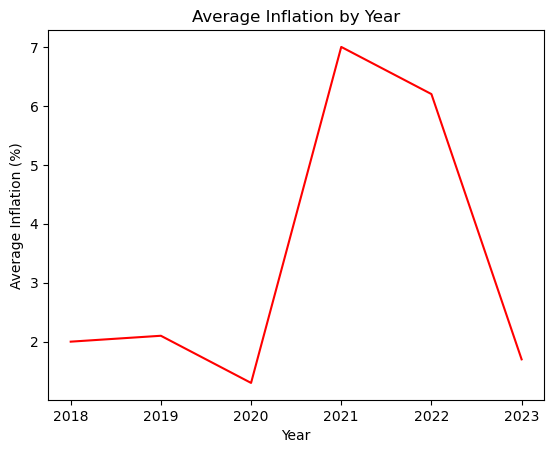

In [281]:
# line graph all XXX
# line graph by year

plt.plot(cpi_five_years_clean["Year"], cpi_five_years_clean["YTD"], color = 'red')
plt.xlabel("Year")
plt.ylabel("Average Inflation (%)")
plt.title("Average Inflation by Year")
plt.savefig("cpi_average.svg")
plt.show()

In [282]:
#indeed_country.head()

#groupby month and year?

#indeed_country["xxx"] = ""
#indeed_country["xxx"] = ""
#indeed_country["xxx"] = ""

indeed_country_clean = indeed_country[['Date', 'Seasonally adjusted percentage', 'Non-seasonally adjusted percentage']]
indeed_country_clean.head()

,Date,Seasonally adjusted percentage,Non-seasonally adjusted percentage
0,2020-02-01,100.0,100.0
1,2020-02-02,100.0,100.1
2,2020-02-03,100.0,100.1
3,2020-02-04,100.0,100.2
4,2020-02-05,100.1,100.3


In [283]:
#indeed_illinois.head()

#groupby month and year

#indeed_illinois["xxx"] = ""
#indeed_illinois["xxx"] = ""
#indeed_illinois["xxx"] = ""

indeed_illinois_clean = indeed_illinois[['Date', 'Seasonally adjusted percentage', 'Non-seasonally adjusted percentage']]
indeed_illinois_clean.head()

,Date,Seasonally adjusted percentage,Non-seasonally adjusted percentage
0,2020-02-01,100.0,100.0
1,2020-02-02,100.0,100.1
2,2020-02-03,100.0,100.2
3,2020-02-04,100.1,100.4
4,2020-02-05,100.2,100.5


In [284]:
#unemploy_ave_and_pop_illinois.head()

#replace NaN with 0?
#groupby month and year
#filter for years 2018 to 2023

In [285]:
unemploy_ave_and_pop_illinois2.head()

,Year 2,Yearly Ave,Ill Pop,Percent Unemployed
0,2013,594350.5000,12882135,NaN
1,2014,467472.5000,12880580,NaN
2,2015,391319.9167,12859995,NaN
3,2016,386372.6667,12801539,NaN
4,2017,324413.5833,12802023,NaN


In [286]:
#unemploy_ave_and_pop_illinois[]
unemploy_ave_and_pop_illinois2 = unemploy_ave_and_pop_illinois2.rename(columns={"Year 2": "Year",
                                                                                "Yearly Ave": "Yearly Average Unemployed",
                                                                                "Ill Pop": "Illinois Population"
                                                                                })

unemploy_ave_and_pop_illinois_clean = unemploy_ave_and_pop_illinois2[['Year', 'Yearly Average Unemployed', 'Illinois Population']]
unemploy_ave_and_pop_illinois_clean.dropna()


,Year,Yearly Average Unemployed,Illinois Population
0,2013,594350.5000,12882135
1,2014,467472.5000,12880580
2,2015,391319.9167,12859995
3,2016,386372.6667,12801539
4,2017,324413.5833,12802023
5,2018,287547.9167,12741080
6,2019,259930.3333,12671821
7,2020,591041.5000,12812508
8,2021,387852.4167,12671469


In [287]:
percent_unemployed = []

for index, row in unemploy_ave_and_pop_illinois_clean.iterrows():
    percent_unemploy = 100 * (row["Yearly Average Unemployed"] / row["Illinois Population"])
    percent_unemployed.append(percent_unemploy)

unemploy_ave_and_pop_illinois_clean["Percent Unemployed"] = percent_unemployed
unemploy_ave_and_pop_illinois_clean.dropna()

,Year,Yearly Average Unemployed,Illinois Population,Percent Unemployed
0,2013,594350.5000,12882135,4.613758
1,2014,467472.5000,12880580,3.629281
2,2015,391319.9167,12859995,3.042924
3,2016,386372.6667,12801539,3.018174
4,2017,324413.5833,12802023,2.534081
5,2018,287547.9167,12741080,2.256857
6,2019,259930.3333,12671821,2.051247
7,2020,591041.5000,12812508,4.613004
8,2021,387852.4167,12671469,3.060832


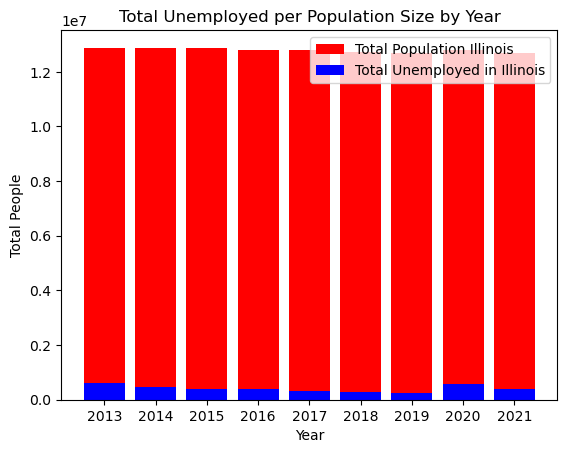

In [296]:
# bar chart of total unemployed and illinois population
# line graph of percent unemployed

plt.bar(unemploy_ave_and_pop_illinois_clean["Year"], unemploy_ave_and_pop_illinois_clean["Illinois Population"], color = 'r', label = 'Total Population Illinois')
plt.bar(unemploy_ave_and_pop_illinois_clean["Year"], unemploy_ave_and_pop_illinois_clean["Yearly Average Unemployed"], color = 'b', label='Total Unemployed in Illinois')
plt.xticks(unemploy_ave_and_pop_illinois_clean["Year"])
#plt.ylim(0, 12890000)
plt.xlabel("Year")
plt.ylabel("Total People")
plt.title("Total Unemployed per Population Size by Year")
plt.legend()
plt.savefig("illinois_unemployment_stacked_bar.svg")
plt.show()

#unemploy_ave_and_pop_illinois_clean

In [297]:
unemploy_five_years_national.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
0,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9,2.0
1,2019,4.0,3.8,3.8,3.6,3.7,3.6,3.7,3.7,3.5,3.6,3.6,3.6,2.1
2,2020,3.5,3.5,4.4,14.7,13.2,11.0,10.2,8.4,7.9,6.9,6.7,6.7,1.3
3,2021,6.3,6.2,6.1,6.1,5.8,5.9,5.4,5.2,4.8,4.5,4.2,3.9,7.0
4,2022,4.0,3.8,3.6,3.6,3.6,3.6,3.5,3.7,3.5,3.7,3.6,3.5,6.2


In [330]:
YTD_national = []

unemploy_five_years_national["YTD"] = ""



for index, row in unemploy_five_years_national.iterrows():
    year_sum_national = row.iloc[1:13].mean()
    YTD_national.append(year_sum_national)

unemploy_five_years_national["YTD"] = YTD_national
unemploy_five_years_national

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
0,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9,3.891667
1,2019,4.0,3.8,3.8,3.6,3.7,3.6,3.7,3.7,3.5,3.6,3.6,3.6,3.683333
2,2020,3.5,3.5,4.4,14.7,13.2,11.0,10.2,8.4,7.9,6.9,6.7,6.7,8.091667
3,2021,6.3,6.2,6.1,6.1,5.8,5.9,5.4,5.2,4.8,4.5,4.2,3.9,5.366667
4,2022,4.0,3.8,3.6,3.6,3.6,3.6,3.5,3.7,3.5,3.7,3.6,3.5,3.641667
5,2023,3.4,3.6,3.5,3.4,3.7,3.6,3.5,NaN,NaN,NaN,NaN,NaN,3.528571


In [322]:

# unemploy_ten_years_national = unemploy_ten_years_national.drop(columns=['Index', 'YTD2'])
unemploy_ten_years_national.dropna()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
0,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7,
1,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6,
2,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0,
3,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7,
4,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1,
5,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9,
6,2019,4.0,3.8,3.8,3.6,3.7,3.6,3.7,3.7,3.5,3.6,3.6,3.6,
7,2020,3.5,3.5,4.4,14.7,13.2,11.0,10.2,8.4,7.9,6.9,6.7,6.7,
8,2021,6.3,6.2,6.1,6.1,5.8,5.9,5.4,5.2,4.8,4.5,4.2,3.9,
9,2022,4.0,3.8,3.6,3.6,3.6,3.6,3.5,3.7,3.5,3.7,3.6,3.5,


In [329]:
YTD_national_10 = []
unemploy_ten_years_national["YTD"] = ""



for index, row in unemploy_ten_years_national.iterrows():
    year_sum_national_ten = row.iloc[1:13].mean()
    YTD_national_10.append(year_sum_national_ten)

unemploy_ten_years_national["YTD"] = YTD_national_10
unemploy_ten_years_national

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
0,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7,7.358333
1,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6,6.158333
2,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0,5.275000
3,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7,4.875000
4,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1,4.358333
5,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9,3.891667
6,2019,4.0,3.8,3.8,3.6,3.7,3.6,3.7,3.7,3.5,3.6,3.6,3.6,3.683333
7,2020,3.5,3.5,4.4,14.7,13.2,11.0,10.2,8.4,7.9,6.9,6.7,6.7,8.091667
8,2021,6.3,6.2,6.1,6.1,5.8,5.9,5.4,5.2,4.8,4.5,4.2,3.9,5.366667
9,2022,4.0,3.8,3.6,3.6,3.6,3.6,3.5,3.7,3.5,3.7,3.6,3.5,3.641667


In [331]:
unemploy_five_years_national


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
0,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9,3.891667
1,2019,4.0,3.8,3.8,3.6,3.7,3.6,3.7,3.7,3.5,3.6,3.6,3.6,3.683333
2,2020,3.5,3.5,4.4,14.7,13.2,11.0,10.2,8.4,7.9,6.9,6.7,6.7,8.091667
3,2021,6.3,6.2,6.1,6.1,5.8,5.9,5.4,5.2,4.8,4.5,4.2,3.9,5.366667
4,2022,4.0,3.8,3.6,3.6,3.6,3.6,3.5,3.7,3.5,3.7,3.6,3.5,3.641667
5,2023,3.4,3.6,3.5,3.4,3.7,3.6,3.5,NaN,NaN,NaN,NaN,NaN,3.528571


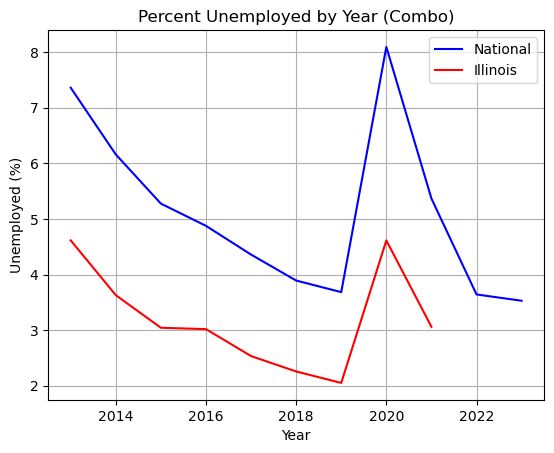

In [332]:
plt.plot(unemploy_ten_years_national["Year"], unemploy_ten_years_national['YTD'], color = 'blue', label = 'National')
plt.plot(unemploy_ave_and_pop_illinois_clean['Year'], unemploy_ave_and_pop_illinois_clean['Percent Unemployed'], color = 'red', label = 'Illinois')
plt.xlabel("Year")
plt.ylabel("Unemployed (%)")
plt.title("Percent Unemployed by Year (Combo)")
plt.legend()
plt.grid()
plt.savefig("percent_unemployment_combo.png")
plt.show()

In [ ]:
#plot line graph 

# x = unemploy_ave_and_pop_illinois_clean['Year']
# y2 = unemploy_ave_and_pop_illinois_clean['Total Unemployed']
# y1 = unemploy_ave_and_pop_illinois_clean['Illinois Population']

# plt.plot(x, y2, color = 'blue', label = 'total pop')
# plt.plot(x, y1, color = 'red', label = 'unemployed')
# plt.legend()
# # plt.plot(unemploy_ave_and_pop_illinois_clean["Year"], unemploy_ave_and_pop_illinois_clean["Illinois Population"], color = 'r')
# # plt.plot(unemploy_ave_and_pop_illinois_clean["Year"], unemploy_ave_and_pop_illinois_clean["Total Unemployed"], bottom = unemploy_ave_and_pop_illinois_clean["Illinois Population"], color = 'b')
# # plt.xticks(x)
# # plt.ylim(0, 12890000)
# plt.xlabel("Year")
# plt.ylabel("Total People")
# plt.title("Total Unemployed per Population Size by Year")
# #plt.legend()
# plt.savefig("illinois_unemployment_stacked_line.svg")
# plt.show()


In [61]:
unemploy_ave_and_pop_illinois_clean

,Year,Label,Total Unemployed,Yearly Average Unemployed,Illinois Population,Percent Unemployed
0,2013,2013 Jan,605461,594350.5,12882135.0,4.700005
1,2013,2013 Feb,608400,NaN,NaN,NaN
2,2013,2013 Mar,609111,NaN,NaN,NaN
3,2013,2013 Apr,607810,NaN,NaN,NaN
4,2013,2013 May,605607,NaN,NaN,NaN
...,...,...,...,...,...,...
121,2023,2023 Feb,289854,NaN,NaN,NaN
122,2023,2023 Mar,283806,NaN,NaN,NaN
123,2023,2023 Apr,275010,NaN,NaN,NaN
124,2023,2023 May,265222,NaN,NaN,NaN


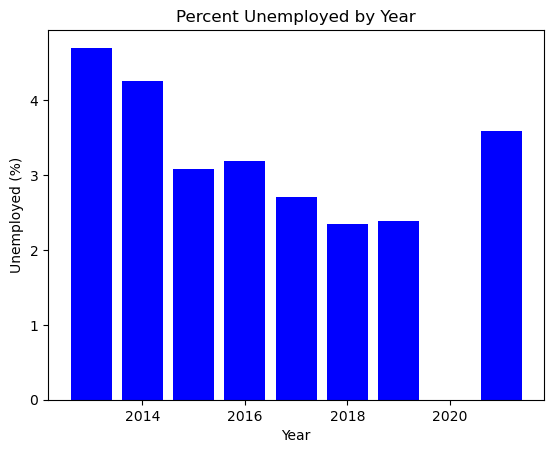

In [32]:
plt.bar(unemploy_ave_and_pop_illinois_clean["Year"], unemploy_ave_and_pop_illinois_clean["Percent Unemployed"], color = 'blue')
plt.xlabel("Year")
plt.ylabel("Unemployed (%)")
plt.title("Percent Unemployed by Year")
#plt.savefig("illinois_percent_unemployment.svg")
plt.show()

In [36]:
unemploy_ave_and_pop_illinois_clean.dtypes

Year                           int64
Label                         object
Total Unemployed               int64
Yearly Average Unemployed    float64
Illinois Population          float64
Percent Unemployed           float64
dtype: object

In [40]:
unemploy_five_years_illinois.head()

#replace NaN with 0?
#groupby month and YEAR; WHAT TO DO WITH VALUE COLUMN, MEAN?
#filter for years 2018 to 2023

#unemploy_five_years_illinois["xxx"] = ""
#unemploy_five_years_illinois["xxx"] = ""
#unemploy_five_years_illinois["xxx"] = ""

unemploy_five_years_illinois_clean = unemploy_five_years_illinois[['Year', 'Period', 'Label', 'Value']]
#unemploy_five_years_illinois_clean
unemploy_five_years_illinois_clean_byyear = unemploy_five_years_illinois_clean.groupby('Year')['Value'].mean()
unemploy_five_years_illinois_clean_byyear

Year
2018    287547.916667
2019    259930.333333
2020    591041.500000
2021    387852.416667
2022    294507.666667
2023    277717.833333
Name: Value, dtype: float64

In [ ]:
#unemploy_five_years_national

YTD_national = []

unemploy_five_years_national["YTD"] = ""
unemploy_five_years_national


for index, row in unemploy_five_years_national.iterrows():
    year_sum_national = row.iloc[1:13].mean()
    YTD_national.append(year_sum_national)

unemploy_five_years_national["YTD"] = YTD
unemploy_five_years_national

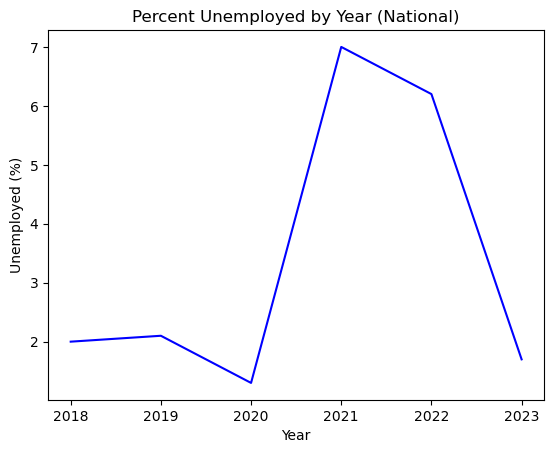

In [18]:
plt.plot(unemploy_five_years_national["Year"], unemploy_five_years_national["YTD"], color = 'blue')
plt.xlabel("Year")
plt.ylabel("Unemployed (%)")
plt.title("Percent Unemployed by Year (National)")
plt.savefig("percent_unemployment_national.svg")
plt.show()

In [16]:
#merged_data = pd.merge(XXX, XXX, how = "left", on = ["XXX", "XXX"])
#merged_data.head()